In [44]:
import torch
import matplotlib.pyplot as plt

images = torch.randn(size=(4,12,12,3))

def v1(images):
    batch_size, im_x, im_y, im_ch = (
        images.shape[0],
        images.shape[1],
        images.shape[2],
        images.shape[3],
    )
    mask_size_factor = torch.randint(low=2, high=4, size=[1])[0]
    mask_size = [int(im_x / mask_size_factor), int(im_y / mask_size_factor)]

    offset_i = torch.randint(low=0, high=im_x - mask_size[0], size=[batch_size])
    offset_j = torch.randint(low=0, high=im_y - mask_size[1], size=[batch_size])

    new_images = images.clone()
    for i in range(batch_size):
        start_i, start_j = offset_i[i], offset_j[i]
        end_i = start_i + mask_size[0]
        end_j = start_j + mask_size[1]
        print(f"{start_i},{start_j}")
        updates = torch.zeros(
            [mask_size[0], mask_size[1], im_ch], dtype=torch.float32
        )
        new_images[i, start_i:end_i, start_j:end_j, :] = updates
    return new_images 

def v2(images):
    batch_size, im_x, im_y, im_ch = (
        images.shape[0],
        images.shape[1],
        images.shape[2],
        images.shape[3],
    )
    mask_size_factor = torch.randint(low=2, high=4, size=[1])[0]
    mask_size = [int(im_x / mask_size_factor), int(im_y / mask_size_factor)]

    start_i = torch.randint(low=0, high=im_x - mask_size[0], size=[])
    start_j = torch.randint(low=0, high=im_y - mask_size[1], size=[])
    end_i = start_i + mask_size[0]
    end_j = start_j + mask_size[1]

    new_images = images.clone()
    updates = torch.zeros(
        [mask_size[0], mask_size[1], im_ch], dtype=torch.float32
    )
    new_images[:, start_i:end_i, start_j:end_j, :] = updates
    return new_images 

def v3(images):
    batch_size, im_x, im_y, im_ch = images.shape
    new_images = images.clone()
    for i in range(batch_size):
        mask_size_factor = torch.randint(low=2, high=4, size=[1])[0]
        mask_size = [int(im_x / mask_size_factor), int(im_y / mask_size_factor)]
        start_i = torch.randint(low=0, high=im_x - mask_size[0], size=[1])
        start_j = torch.randint(low=0, high=im_y - mask_size[1], size=[1])
        end_i = start_i + mask_size[0]
        end_j = start_j + mask_size[1]
        print(f"{start_i},{start_j}")
        updates = torch.zeros(
            [mask_size[0], mask_size[1], im_ch], dtype=torch.float32
        )
        new_images[i, start_i:end_i, start_j:end_j, :] = updates
    return new_images 

In [45]:
new_images = v3(images)

tensor([0]),tensor([4])
tensor([6]),tensor([0])
tensor([4]),tensor([2])
tensor([0]),tensor([5])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


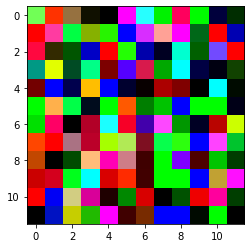

In [46]:
plt.imshow(images[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


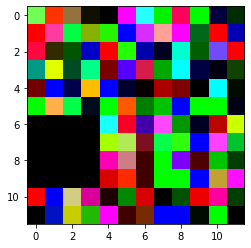

In [47]:
plt.imshow(new_images[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


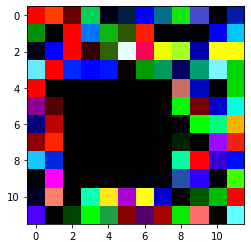

In [48]:
plt.imshow(new_images[2])